In [22]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={'font.family': 'sans', 'font.size': 24, 'axes.titlesize':24, 'axes.labelsize':24})
#if you want to know current working dir
os.chdir('..')

from src.utils import *

%matplotlib inline


In [7]:
# Loading the data
speeds_train_df = pd.read_csv(resources_path('data', 'speeds_test.csv.gz'), engine='c')
sensors_df = pd.read_csv(resources_path('data', 'sensors.csv.gz'), engine='c')

   KEY         DATETIME_UTC   KM   SPEED_AVG   SPEED_SD  SPEED_MIN  SPEED_MAX  \
0    0  2018-12-01 05:45:00  443  149.462750  11.339183    137.530    186.070   
1    0  2018-12-01 14:30:00  443  183.164204  18.459800    140.766    223.284   
2    0  2018-12-02 01:30:00  443  172.317000  14.873284    161.800    182.834   
3    0  2018-12-02 08:00:00  443  181.913414  21.211454    139.148    224.902   
4    0  2018-12-03 06:00:00  443  155.443571  19.456223    121.350    218.430   

   N_VEHICLES  KEY_2  
0          24  0_443  
1          49  0_443  
2           2  0_443  
3          58  0_443  
4          84  0_443  
          KEY      KM    SPEED_AVG     SPEED_SD    SPEED_MIN    SPEED_MAX  \
count  3017.0  3017.0  3017.000000  3017.000000  3017.000000  3017.000000   
mean      0.0   443.0   170.684775    19.599331   133.723383   213.554548   
std       0.0     0.0    10.466627     5.486233    20.548307    17.402654   
min       0.0   443.0   129.440000     1.144099    64.720000   131.

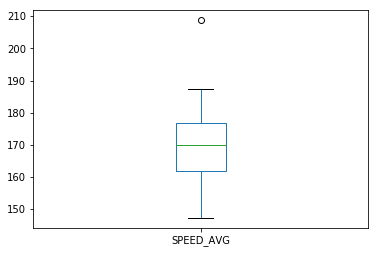

In [3]:
# Processing data
first_sensor = speeds_train_df[(speeds_train_df['KEY_2'] == '0_443')]
print(first_sensor.head(5))
print(first_sensor.describe())
first_sensor[first_sensor[DATETIME] < '2018-12-02'].plot(x=DATETIME, y=SPEED_AVG, kind='box')
plt.show()

In [48]:
df = speeds_train_df[[KEY, KEY_2, DATETIME, N_CARS, SPEED_AVG]][speeds_train_df[KEY_2] == '0_443'].sort_values(by=DATETIME)
sensors = sensors_df[(sensors_df[KM] == 443) & (sensors_df[KEY] == 0)].drop_duplicates()
df = df.join(sensors.set_index(KEY), on=KEY)

df.head(5)

,KEY,KEY_2,DATETIME_UTC,N_VEHICLES,SPEED_AVG,EMERGENCY_LANE,KM,LANES,ROAD_TYPE
1569379,0,0_443,2018-12-01 00:00:00,6,185.800333,1,443,2,1
2789742,0,0_443,2018-12-01 00:15:00,11,163.270909,1,443,2,1
2266469,0,0_443,2018-12-01 00:30:00,10,159.373000,1,443,2,1
3313750,0,0_443,2018-12-01 00:45:00,8,182.227250,1,443,2,1
871831,0,0_443,2018-12-01 01:00:00,16,183.036250,1,443,2,1


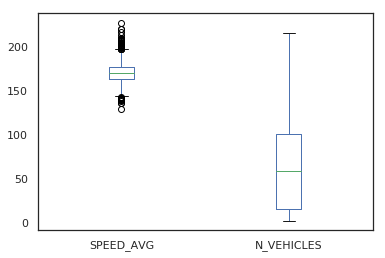

In [63]:
# Some plots
df.plot(y=[SPEED_AVG, N_CARS], kind='box')
plt.show()

## Plots for searching correlations in a single road

In [66]:
df_to_plot = speeds_train_df[[DATETIME, SPEED_AVG, N_CARS]]
df_to_plot = df_to_plot[df_to_plot.DATETIME_UTC < '2018-12-02'].head(500)
df_to_plot.describe()

,SPEED_AVG,N_VEHICLES
count,500.000000,500.000000
mean,222.219435,263.654000
std,18.862798,307.706752
min,117.682533,2.000000
25%,212.192682,53.000000
50%,222.656579,128.000000
75%,231.834696,383.250000
max,299.195167,1375.000000


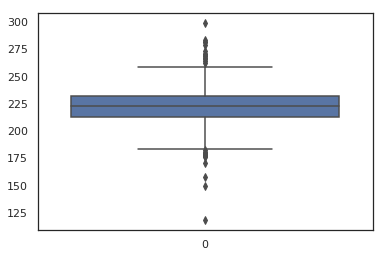

In [83]:
sns.boxplot(data=df_to_plot.SPEED_AVG);

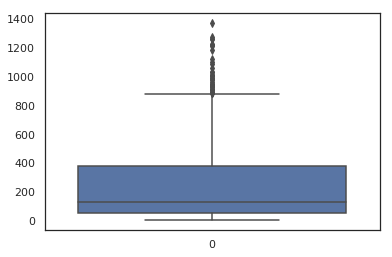

In [82]:
sns.boxplot(data=df_to_plot.N_VEHICLES);

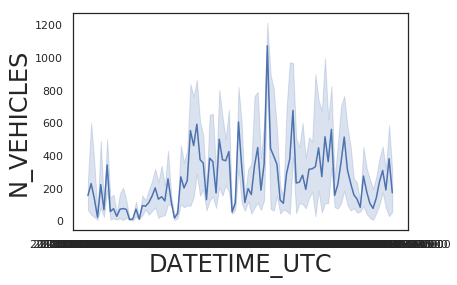

In [76]:
sns.lineplot(x=df_to_plot.DATETIME_UTC, y=df_to_plot.N_VEHICLES);

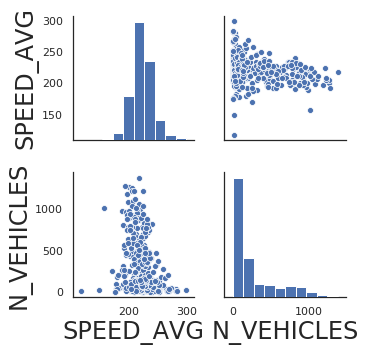

In [77]:
sns.pairplot(df_to_plot);